Итоговая работа

Программа для обработки, визуализации, построения временных рядов и сохранения показаний с датчика в базу данных.

Руководство пользователя:
1. Для визуализации базы данных необходимо ввести: visualize_bd()
2. Для визуализации показаний влажности за весь период необходимо ввести: visualize_ind()
3. Для визуализации показаний влажности за определённое время необходимо ввести: visualize_opr() и далее нажать пробел и ввести необходимое время в формате hh:mm
4. Для изменения показания влажности необходимо ввести: change() далее новое значение показания и номер показания которе необходимо изменить
5. Для удаления значения из таблицы необходимо ввести: delete() и далее значение удаляемого показания
6. По окончании работы с базой данных для её закрытия необходимо ввести: close()
7. Для добавления строки в базу данных необходимо ввести: adding() и далее последовательно номер показания, дату, время и значение показания
8. Для выявление брака продукции необходимо ввести: brak()
9. Для пострения тренда(графика) показаний за смену необходимо ввести: trend() ; Для построения тренда среднего значения необходимо ввести: trend_sr()
10. Для прогнозирования следующего значения влажности необходимо ввести: forecasting()



In [19]:
import numpy
import pandas
import sqlite3
import matplotlib
import numpy as np
import pandas as pd
from pylab import rcParams 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
base = sqlite3.connect('Sensor_indications.db')                             # Cоздание базы данных (далее БД)
cur = base.cursor()                                                         # Создание курсора для управления БД

datchik = pd.read_excel(r'C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\1. Итоговая работа\pokazaniya.xlsx', sheet_name = None)  # Присвоение перемееной таблице с данными из эксель

for sheet in datchik:                                                       # Добавление таблицы с данными в базу данных
    datchik[sheet].to_sql(sheet,base,index = False)
base.commit()

In [3]:
def adding():
    cur.execute('INSERT INTO humidity_sensor VALUES(?, ?, ?, ?)', (input(), input(), input(), input()))               # Добавления строки в БД
    base.commit()
    
mass = []
def inputing_mass():                                           # Функция для добавления значений анализов в список, а потом в БД
    mass.append([input(), input(), input(), input()])
    cur.executemany('INSERT INTO humidity_sensor VALUES(?, ?, ?, ?)', (mass))            
    base.commit()

In [4]:
def visualize_bd():                                                                    # Визуализация БД
    vis = cur.execute('SELECT * FROM humidity_sensor').fetchall()                       
    print(vis)

def visualize_ind():                                                                   # Визуализация всего столбца показаний
    vis_ind = cur.execute('SELECT indication FROM humidity_sensor').fetchall()         
    print(vis_ind)

def visualize_opr():                                                                   # Визуализация влажности за определённое время
    vis_opr = cur.execute("SELECT indication FROM humidity_sensor WHERE time == ?", (input(),)).fetchone() 
    print(vis_opr)

def change():                                                                          # Изменение значения в ячейке
    cur.execute('UPDATE humidity_sensor SET indication == ? WHERE number == ?', (input(), input(),))        
    base.commit()

def delete():                                                                          # Удаление значений из таблицы
    cur.execute('DELETE FROM humidity_sensor WHERE indication == ?', (input(),)) 
    base.commit()

def close():                                                                           # Закрытие базы данных
    base.close()

In [5]:
def brak():                                                                            # Функция для выявления брака продукции
    xv = cur.execute("SELECT time, indication FROM humidity_sensor WHERE indication > 9").fetchall() 
    print("Брак, повышенная влажность:", xv)

    xn = cur.execute("SELECT time, indication FROM humidity_sensor WHERE indication < 6").fetchall() 
    print("Брак, пониженная влажность:", xn)


In [6]:
indications = pd.read_csv(r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\1. Итоговая работа\indications.csv")  # Импорт файла с данными
indications.head()

indications.set_index('Time', inplace = True)                             # Время - индекс
indications.head()

def trend():
    graphic = indications.plot(figsize = (20,5))                          # Построение графика через Пандас
    graphic.set(title = 'Влажность полотна в течении смены', xlabel = 'Время', ylabel = 'Показания датчика влажности')                 


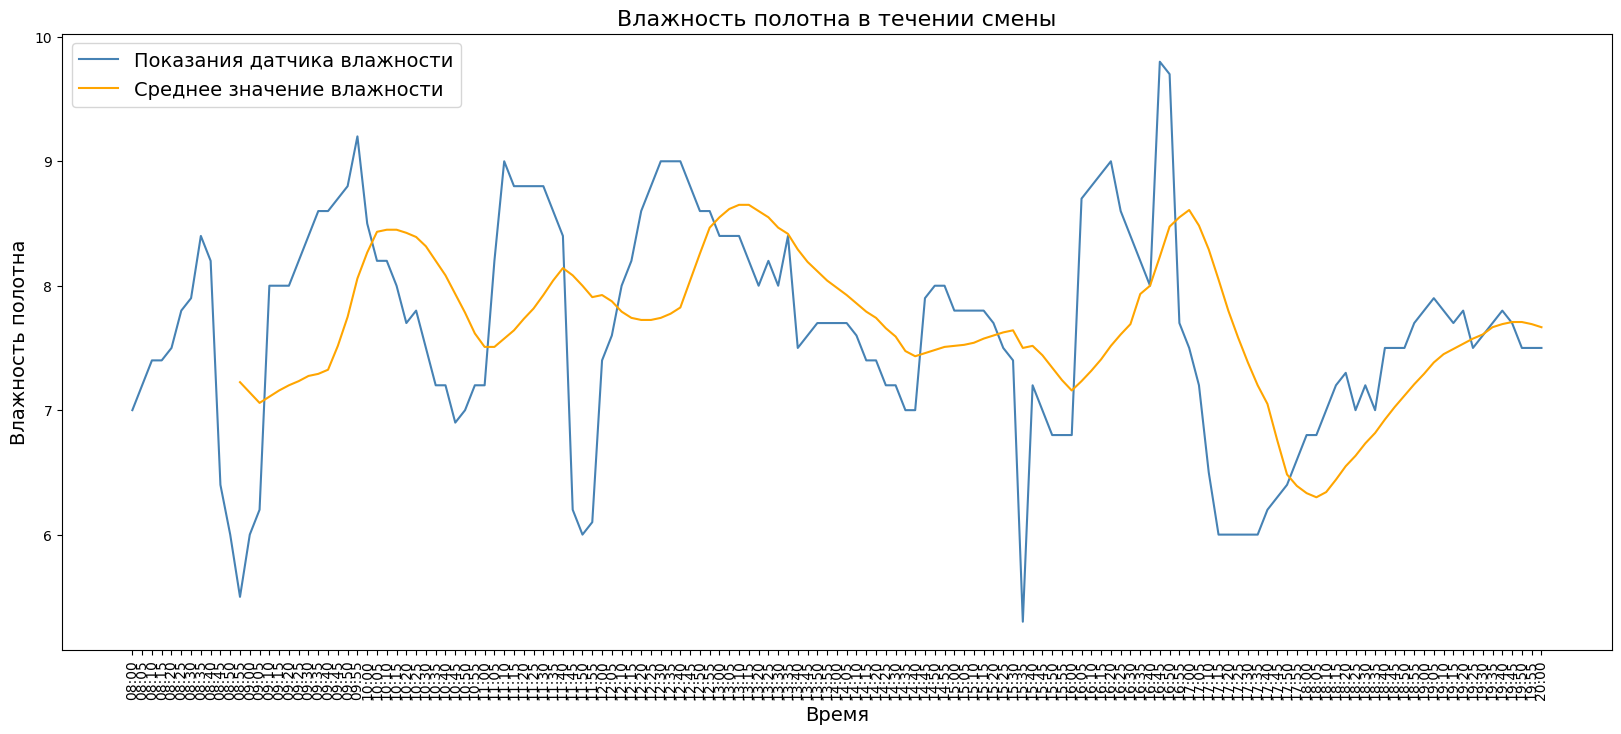

In [7]:
def trend_sr():                                                 # Построение графика через Матплотлиб
    plt.figure(figsize = (20,8))                                # Задание размера графика
    plt.plot(indications, label = 'Показания датчика влажности', color = 'steelblue')                          # Задание кривых
    plt.plot(indications.rolling(window = 12).mean(), label = 'Среднее значение влажности', color = 'orange')
    plt.legend(title = '', loc = 'upper left', fontsize = 14)                    # Добавление легенды
    plt.xlabel('Время', fontsize = 14)                                           # Добавление подписей к осям и заголовков
    plt.ylabel('Влажность полотна', fontsize = 14)
    plt.title('Влажность полотна в течении смены', fontsize = 16)
    plt.xticks(rotation=90)
    plt.show()
trend_sr()


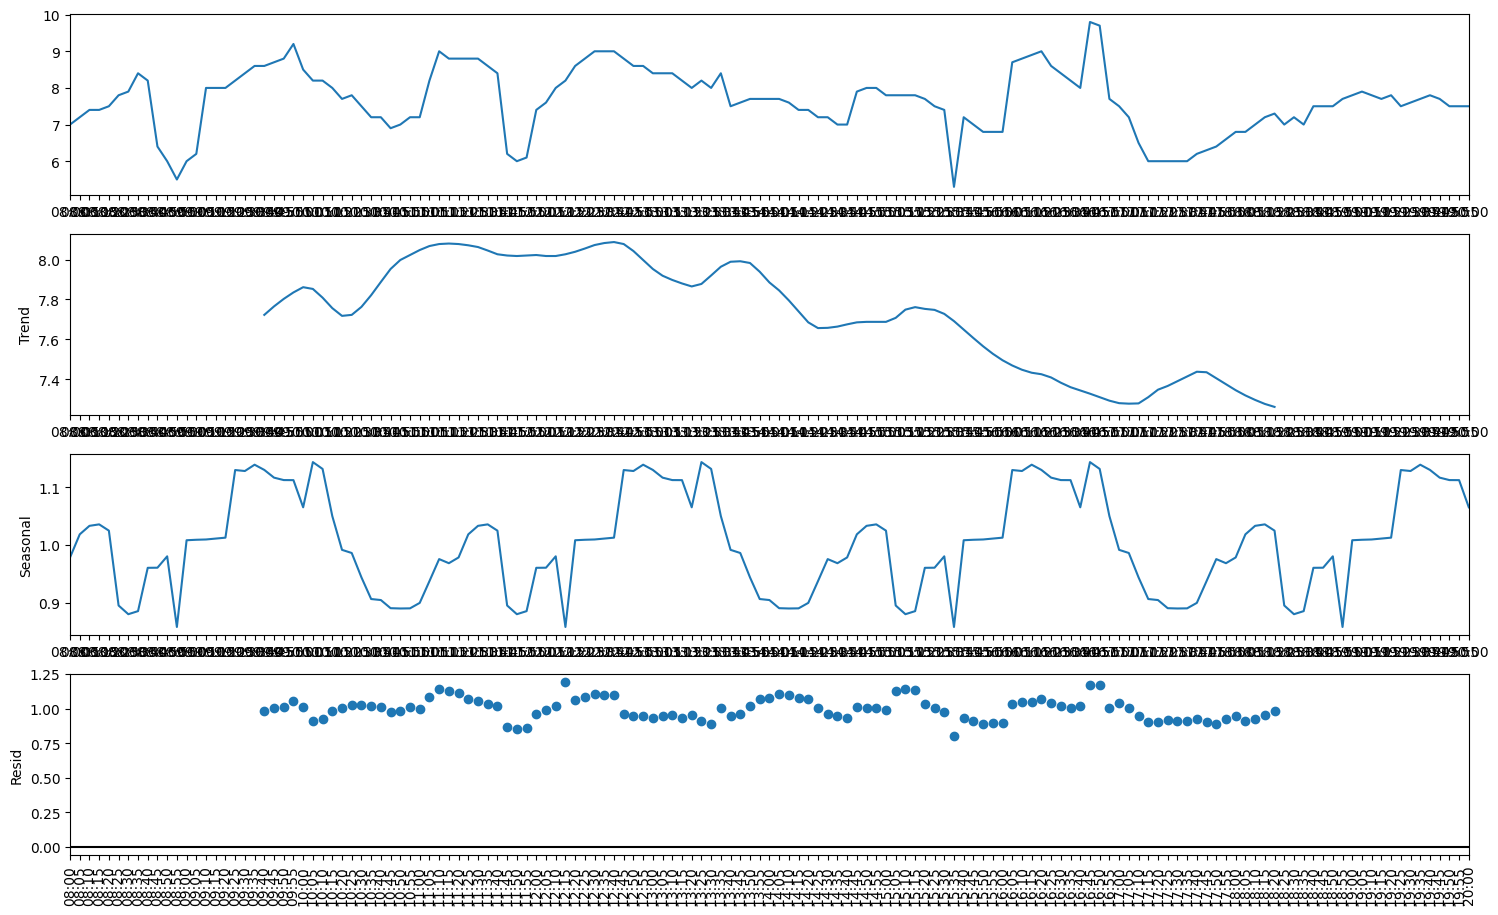

In [8]:
# Разложение временного ряда на компоненты
                
rcParams['figure.figsize'] = 15, 9            # Задание размера графика

decompose = seasonal_decompose(indications, model='multiplicative', period=40)  # Применение функции к данным о влажности
decompose.plot()

plt.xticks(rotation=90)                       # Вертикальное расположение значений по оси х
plt.show()

In [9]:
adf_test = adfuller(indications['#Indications']) # Передача функции столбца с данными о перевозках и помещение результата в adf_test
 
print('p-value = ' + str(adf_test[1]))           # Выведение p-value

# Делаем вывод, что процесс стационарный

p-value = 0.0021217167787742105


In [70]:
# Прогнозирование следующего значения с помощью модели экспоненциального сглаживания

def forecasting():
  indications = pd.read_csv(r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\1. Итоговая работа\indications.csv", index_col = 'Time', parse_dates = True)
  indications.head(3)

  alpha = 0.2
 
  exp_smoothing = [indications['#Indications'][0]]                    # Первое значение совпадает со значением временного ряда
 
  for i in range(1, len(indications['#Indications'])):                # Последовательное применение формулы ко всем элементам ряда в цикле for  
    exp_smoothing.append(alpha * indications['#Indications'][i] + (1 - alpha) * exp_smoothing[i - 1])
 
  exp_smoothing[-1]                                                   # Вывод прогнозного значения для следующего показания

  len(indications), len(exp_smoothing)

  indications['Exp_smoothing'] = exp_smoothing                        # Добавление кривой сглаживаия в качестве столбца в датафрейм
  indications.tail(3)

  last_Time = indications.iloc[[-1]].index                            # Последний индекс (20:00)
 
  last_Time = last_Time + timedelta(days = 0.04)                      # Прибавление еще одного показания
  last_Time
 
  indications = indications.append(pd.DataFrame(index = last_Time))   # Добавление его в датафрейм
 
  indications.tail()

  indications['Exp_smoothing'] = indications['Exp_smoothing'].shift(1)   # Сдвиг столбца на 1

  indications.head()

  plt.figure(figsize = (15,8))                                        # Задание размера
 
  plt.plot(indications['#Indications'], label = 'Данные с датчика влажности', color = 'steelblue')    # Выведение данных и кривой экспоненциального сглаживания
  plt.plot(indications['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
 
  plt.legend(title = '', loc = 'upper left', fontsize = 14)           # Добавление легенды, ее положения на графике и размера шрифта
 
  plt.ylabel('Влажность полотна', fontsize = 14)                      # Добавление подписей к осям и заголовки
  plt.xlabel('Время', fontsize = 14)
  plt.title('Показания влажности картонного полотна. Прогноз на следующее показание', fontsize = 16)

  plt.show()